# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
!pip install ipywidgets ipykernel


Defaulting to user installation because normal site-packages is not writeable


In [11]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=64, 
    shuffle=True
)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=64, 
    shuffle=False
)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I have chosen these transforms to serve two main purposes:- converting the images into tensors and normalizing their pixel values. 

1. ToTensor: This transform converts the input image, form PIL Image format into a tensor. It also scales the pixel values from the range [0, 255] to [0, 1], making it easier for the neural network to learn.

2. Normalize: This transform normalizes the tensor by subtracting the mean and dividing by the standard deviation. In this case, the mean and standard deviation values (0.1307 and 0.3081, respectively) are pre-calculated statistics for the MNIST dataset. Normalization helps to scale the features to a similar range, which can improve convergence during training and prevent certain features from dominating others. 

By applying these transforms, we ensure that the input data is in a suitable format for training the neural network and that it's scaled in a way that facilitates efficient learning.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [13]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


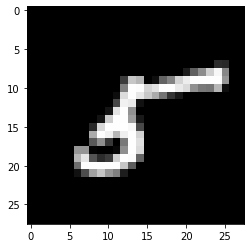

9


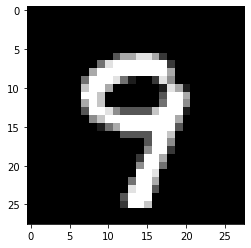

9


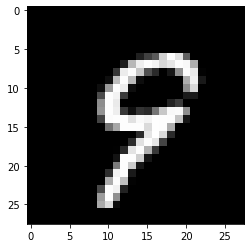

7


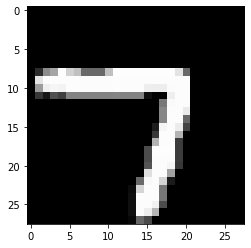

3


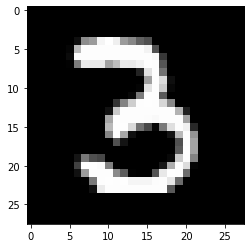

In [14]:
# Explore data
## YOUR CODE HERE ##
transform_visualize = transforms.Compose([
    transforms.ToTensor()
])
trainset_visualize = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform_visualize
)
trainloader_visualize = torch.utils.data.DataLoader(
    trainset_visualize, 
    batch_size=64, 
    shuffle=True
)

def show5(img_loader):
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
        image = images[i].numpy()
        plt.imshow(image.squeeze(), cmap='gray')
        plt.show()

show5(trainloader_visualize)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
trainset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=64, 
    shuffle=True
)

testset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=64, 
    shuffle=False
)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [15]:
## YOUR CODE HERE ##
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = SimpleNN()
print(model)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [16]:

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = SimpleNN()

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print(model)
print("Loss function:", criterion)
print("Optimizer:", optimizer)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Loss function: NLLLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
## YOUR CODE HERE ##

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = SimpleNN().to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=64, 
    shuffle=True
)

epochs = 10
print_every = 250
epoch_losses = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Optimization
        optimizer.step()

        # statistics
        running_loss += loss.item()
        if i % print_every == (print_every - 1):  # print every print_every mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / print_every:.3f}")
            running_loss = 0.0
    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1} Average Loss: {epoch_loss:.3f}")

print("Finished Training")



[Epoch 1, Batch 250] Loss: 0.653
[Epoch 1, Batch 500] Loss: 0.260
[Epoch 1, Batch 750] Loss: 0.196
Epoch 1 Average Loss: 0.033
[Epoch 2, Batch 250] Loss: 0.124
[Epoch 2, Batch 500] Loss: 0.125
[Epoch 2, Batch 750] Loss: 0.110
Epoch 2 Average Loss: 0.022
[Epoch 3, Batch 250] Loss: 0.082
[Epoch 3, Batch 500] Loss: 0.078
[Epoch 3, Batch 750] Loss: 0.080
Epoch 3 Average Loss: 0.016
[Epoch 4, Batch 250] Loss: 0.056
[Epoch 4, Batch 500] Loss: 0.060
[Epoch 4, Batch 750] Loss: 0.060
Epoch 4 Average Loss: 0.013
[Epoch 5, Batch 250] Loss: 0.043
[Epoch 5, Batch 500] Loss: 0.047
[Epoch 5, Batch 750] Loss: 0.046
Epoch 5 Average Loss: 0.010
[Epoch 6, Batch 250] Loss: 0.036
[Epoch 6, Batch 500] Loss: 0.033
[Epoch 6, Batch 750] Loss: 0.037
Epoch 6 Average Loss: 0.007
[Epoch 7, Batch 250] Loss: 0.025
[Epoch 7, Batch 500] Loss: 0.028
[Epoch 7, Batch 750] Loss: 0.031
Epoch 7 Average Loss: 0.006
[Epoch 8, Batch 250] Loss: 0.023
[Epoch 8, Batch 500] Loss: 0.022
[Epoch 8, Batch 750] Loss: 0.023
Epoch 8 Aver

Plot the training loss (and validation loss/accuracy, if recorded).

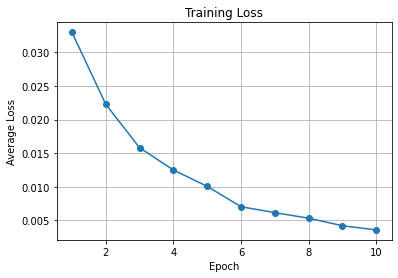

In [18]:
## YOUR CODE HERE ##

plt.plot(range(1, epochs + 1), epoch_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
## YOUR CODE HERE ##
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {100 * accuracy:.2f}%")


Accuracy on the test set: 97.82%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

[Epoch 1, Batch 250] Loss: 0.007
[Epoch 1, Batch 500] Loss: 0.007
[Epoch 1, Batch 750] Loss: 0.005
Epoch 1 Average Loss: 0.001
[Epoch 2, Batch 250] Loss: 0.005
[Epoch 2, Batch 500] Loss: 0.005
[Epoch 2, Batch 750] Loss: 0.004
Epoch 2 Average Loss: 0.001
[Epoch 3, Batch 250] Loss: 0.004
[Epoch 3, Batch 500] Loss: 0.003
[Epoch 3, Batch 750] Loss: 0.004
Epoch 3 Average Loss: 0.001
[Epoch 4, Batch 250] Loss: 0.003
[Epoch 4, Batch 500] Loss: 0.004
[Epoch 4, Batch 750] Loss: 0.004
Epoch 4 Average Loss: 0.001
[Epoch 5, Batch 250] Loss: 0.003
[Epoch 5, Batch 500] Loss: 0.004
[Epoch 5, Batch 750] Loss: 0.003
Epoch 5 Average Loss: 0.001
[Epoch 6, Batch 250] Loss: 0.003
[Epoch 6, Batch 500] Loss: 0.003
[Epoch 6, Batch 750] Loss: 0.003
Epoch 6 Average Loss: 0.001
[Epoch 7, Batch 250] Loss: 0.003
[Epoch 7, Batch 500] Loss: 0.003
[Epoch 7, Batch 750] Loss: 0.003
Epoch 7 Average Loss: 0.001
[Epoch 8, Batch 250] Loss: 0.003
[Epoch 8, Batch 500] Loss: 0.003
[Epoch 8, Batch 750] Loss: 0.003
Epoch 8 Aver

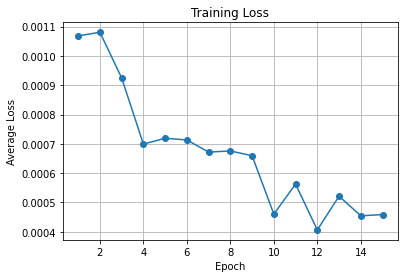

Accuracy on the test set: 98.08%


In [21]:
## YOUR CODE HERE ##
learning_rate = 0.001
epochs = 15
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
epoch_losses = []
for epoch in range(epochs):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % print_every == (print_every - 1):  # print every print_every mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / print_every:.3f}")
            running_loss = 0.0

    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1} Average Loss: {epoch_loss:.3f}")

print("Finished Training")

plt.plot(range(1, epochs + 1), epoch_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {100 * accuracy:.2f}%")


## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), "mnist_model.pth")

print("Model saved successfully!")

Model saved successfully!
